In [1]:
from scipy.ndimage import gaussian_filter
from tifffile import imread
import cv2
import math
import os
from os.path import join, dirname
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

### Load Data

In [2]:
folder_FUS_miR21 = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig4_regulation/FUS488_miR21_PAINT/selected_condensates"
os.chdir(folder_FUS_miR21)

lst_fname_FUS_PAINT = [f for f in os.listdir(".") if f.endswith("-left-PAINT.tif")]
lst_fname_miR21_PAINT = [f[:-14] + "right-PAINT.tif" for f in lst_fname_FUS_PAINT]
lst_fname_FUS_step = [f[:-14] + "left-stepsize.tif" for f in lst_fname_FUS_PAINT]
lst_fname_miR21_step = [f[:-14] + "right-stepsize.tif" for f in lst_fname_FUS_PAINT]

lst_FUS_PAINT = [imread(f) for f in lst_fname_FUS_PAINT]
lst_miR21_PAINT = [imread(f) for f in lst_fname_miR21_PAINT]
lst_FUS_step = [imread(f) for f in lst_fname_FUS_step]
lst_miR21_step = [imread(f) for f in lst_fname_miR21_step]

### Functions

In [3]:
def weighted_Pearson(img1_flatten, img2_flatten, weights):
    # calculate mean for images and weights
    mean_img1 = np.sum(img1_flatten * weights) / np.sum(weights)
    mean_img2 = np.sum(img2_flatten * weights) / np.sum(weights)
    mean_weights = np.mean(weights)

    # calculate weighted covariance and variances
    cov = np.sum(
        weights * (img1_flatten - mean_img1) * (img2_flatten - mean_img2)
    ) / np.sum(weights)
    var_img1 = np.sum(weights * (img1_flatten - mean_img1) ** 2) / np.sum(weights)
    var_img2 = np.sum(weights * (img2_flatten - mean_img2) ** 2) / np.sum(weights)

    # calculate weighted correlation
    weighted_corr = cov / np.sqrt(var_img1 * var_img2)

    return weighted_corr

### FUS PAINT - FL PAINT

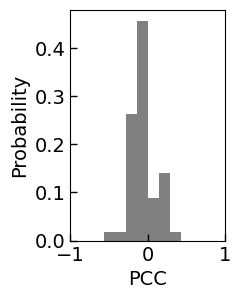

In [4]:
weighted_corr_FlocRloc = []
for img1, img2 in zip(lst_FUS_PAINT, lst_miR21_PAINT):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = img1_flatten**2 + img2_flatten**2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_FlocRloc.append(weighted_corr)

plt.figure(figsize=(2, 3))
plt.hist(
    weighted_corr_FlocRloc,
    bins=14,
    range=(-1, 1),
    color="gray",
    weights=np.ones_like(weighted_corr_FlocRloc) / len(weighted_corr_FlocRloc),
)
plt.xlim(-1, 1)
#plt.ylim(0, 0.37)
plt.xlabel("PCC", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=14,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig(
    "../weighted_pearson_FlocRloc.png", format="png", dpi=300, bbox_inches="tight"
)

### FUS PAINT-stepsize

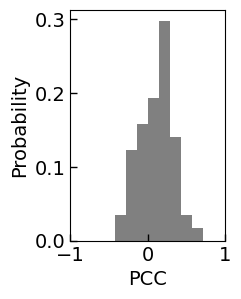

In [5]:
weighted_corr_FlocFstep = []
for img1, img2 in zip(lst_FUS_PAINT, lst_FUS_step):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = img1_flatten**2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_FlocFstep.append(weighted_corr)

plt.figure(figsize=(2, 3))
plt.hist(
    weighted_corr_FlocFstep,
    bins=14,
    range=(-1, 1),
    color="gray",
    weights=np.ones_like(weighted_corr_FlocFstep) / len(weighted_corr_FlocFstep),
)
plt.xlim(-1, 1)
# plt.ylim(0, 0.5)
plt.xlabel("PCC", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=14,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig(
    "../weighted_pearson_FlocFstep.png", format="png", dpi=300, bbox_inches="tight"
)

### FL PAINT-stepsize

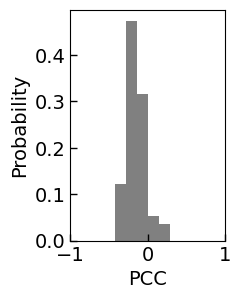

In [6]:
weighted_corr_RlocRstep = []
for img1, img2 in zip(lst_miR21_PAINT, lst_miR21_step):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = img1_flatten**2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_RlocRstep.append(weighted_corr)

plt.figure(figsize=(2, 3))
plt.hist(
    weighted_corr_RlocRstep,
    bins=14,
    range=(-1, 1),
    color="gray",
    weights=np.ones_like(weighted_corr_RlocRstep) / len(weighted_corr_RlocRstep),
)
plt.xlim(-1, 1)
#plt.ylim(0, 0.37)
plt.xlabel("PCC", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=14,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig(
    "../weighted_pearson_RlocRstep.png", format="png", dpi=300, bbox_inches="tight"
)

### FUS step - FL step

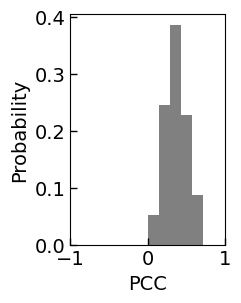

In [7]:
weighted_corr_FstepRstep = []
for img1, img2, w1, w2 in zip(lst_FUS_step, lst_miR21_step, lst_FUS_PAINT, lst_miR21_PAINT):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = w1.flatten() ** 2 + w2.flatten() ** 2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_FstepRstep.append(weighted_corr)

plt.figure(figsize=(2, 3))
plt.hist(
    weighted_corr_FstepRstep,
    bins=14,
    range=(-1, 1),
    color="gray",
    weights=np.ones_like(weighted_corr_FstepRstep) / len(weighted_corr_FstepRstep),
)
plt.xlim(-1, 1)
#plt.ylim(0, 0.37)
plt.xlabel("PCC", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=14,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig(
    "../weighted_pearson_FstepRstep.png", format="png", dpi=300, bbox_inches="tight"
)

### Stats compare miR21-FL

In [8]:
df_FUS_miR21 = pd.DataFrame(
    {
        "label": np.repeat("miRNA", len(weighted_corr_FlocRloc)),
        r"r(F$_{loc}$, R$_{loc}$)": weighted_corr_FlocRloc,
        r"r(F$_{step}$, R$_{step}$)": weighted_corr_FstepRstep,
        r"r(F$_{loc}$, F$_{step}$)": weighted_corr_FlocFstep,
        r"r(R$_{loc}$, R$_{step}$)": weighted_corr_RlocRstep,
    },
    dtype=object,
)
df_FUS_miR21 = df_FUS_miR21.astype(
    {
        r"r(F$_{loc}$, R$_{loc}$)": float,
        r"r(F$_{step}$, R$_{step}$)": float,
        r"r(F$_{loc}$, F$_{step}$)": float,
        r"r(R$_{loc}$, R$_{step}$)": float,
    }
)

In [9]:
folder_FUS_FL = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig3_coralled by nano domains/FUS488_FL_PAINT/pooled_better_best"
os.chdir(folder_FUS_FL)

lst_fname_FUS_PAINT = [f for f in os.listdir(".") if f.endswith("-left-PAINT.tif")]
lst_fname_FL_PAINT = [f[:-14] + "right-PAINT.tif" for f in lst_fname_FUS_PAINT]
lst_fname_FUS_step = [f[:-14] + "left-stepsize.tif" for f in lst_fname_FUS_PAINT]
lst_fname_FL_step = [f[:-14] + "right-stepsize.tif" for f in lst_fname_FUS_PAINT]

lst_FUS_PAINT = [imread(f) for f in lst_fname_FUS_PAINT]
lst_FL_PAINT = [imread(f) for f in lst_fname_FL_PAINT]
lst_FUS_step = [imread(f) for f in lst_fname_FUS_step]
lst_FL_step = [imread(f) for f in lst_fname_FL_step]

weighted_corr_FlocRloc = []
for img1, img2 in zip(lst_FUS_PAINT, lst_FL_PAINT):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = img1_flatten**2 + img2_flatten**2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_FlocRloc.append(weighted_corr)

weighted_corr_FlocFstep = []
for img1, img2 in zip(lst_FUS_PAINT, lst_FUS_step):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = img1_flatten**2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_FlocFstep.append(weighted_corr)

weighted_corr_RlocRstep = []
for img1, img2 in zip(lst_FL_PAINT, lst_FL_step):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = img1_flatten**2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_RlocRstep.append(weighted_corr)

weighted_corr_FstepRstep = []
for img1, img2, w1, w2 in zip(lst_FUS_step, lst_FL_step, lst_FUS_PAINT, lst_FL_PAINT):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = w1.flatten() ** 2 + w2.flatten() ** 2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_FstepRstep.append(weighted_corr)

df_FUS_FL = pd.DataFrame(
    {
        "label": np.repeat("mRNA", len(weighted_corr_FlocRloc)),
        r"r(F$_{loc}$, R$_{loc}$)": weighted_corr_FlocRloc,
        r"r(F$_{step}$, R$_{step}$)": weighted_corr_FstepRstep,
        r"r(F$_{loc}$, F$_{step}$)": weighted_corr_FlocFstep,
        r"r(R$_{loc}$, R$_{step}$)": weighted_corr_RlocRstep,
    },
    dtype=object,
)
df_FUS_FL = df_FUS_FL.astype(
    {
        r"r(F$_{loc}$, R$_{loc}$)": float,
        r"r(F$_{step}$, R$_{step}$)": float,
        r"r(F$_{loc}$, F$_{step}$)": float,
        r"r(R$_{loc}$, R$_{step}$)": float,
    }
)

In [10]:
df_plot = pd.melt(
    pd.concat([df_FUS_FL, df_FUS_miR21]),
    id_vars=["label"],
    value_vars=[r"r(F$_{loc}$, R$_{loc}$)", r"r(F$_{step}$, R$_{step}$)", r"r(F$_{loc}$, F$_{step}$)", r"r(R$_{loc}$, R$_{step}$)"],
    var_name="pair_name",
    value_name="pearsonr",
)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

r(F$_{step}$, R$_{step}$)_mRNA v.s. r(F$_{step}$, R$_{step}$)_miRNA: t-test independent samples with Bonferroni correction, P_val=2.359e-01 stat=1.903e+00
r(F$_{loc}$, R$_{loc}$)_mRNA v.s. r(F$_{loc}$, R$_{loc}$)_miRNA: t-test independent samples with Bonferroni correction, P_val=2.610e-12 stat=-7.896e+00
r(F$_{loc}$, R$_{loc}$)_miRNA v.s. r(F$_{step}$, R$_{step}$)_miRNA: t-test independent samples with Bonferroni correction, P_val=8.996e-27 stat=-1.446e+01
r(F$_{loc}$, R$_{loc}$)_mRNA v.s. r(F$_{step}$, R$_{step}$)_mRNA: t-test independent samples with Bonferroni correction, P_val=3.659e-67 stat=-2.829e+01


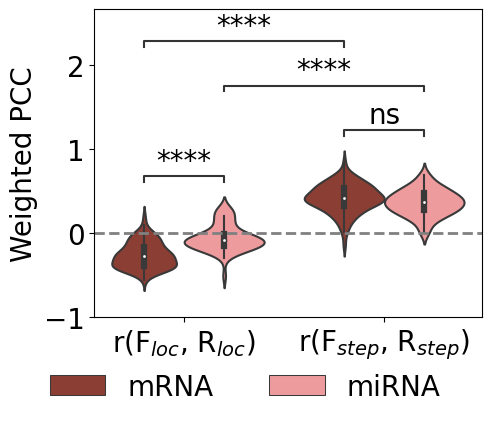

In [13]:
import seaborn as sns
from statannot import add_stat_annotation

selector = (df_plot["pair_name"] == r"r(F$_{loc}$, R$_{loc}$)") | (
    df_plot["pair_name"] == r"r(F$_{step}$, R$_{step}$)"
)

plt.close()
plt.figure(figsize=(5, 4))
ax = sns.violinplot(
    data=df_plot[selector],
    x="pair_name",
    y="pearsonr",
    hue="label",
    dodge=True,
    hue_order=["mRNA", "miRNA"],
    palette=["#9a3324", "#fc8d91"],
)
plt.ylim(-1, 2.2)
add_stat_annotation(
    ax,
    data=df_plot[selector],
    x="pair_name",
    y="pearsonr",
    hue="label",
    box_pairs=[
        (
            (r"r(F$_{loc}$, R$_{loc}$)", "mRNA"),
            (r"r(F$_{loc}$, R$_{loc}$)", "miRNA"),
        ),
        (
            (r"r(F$_{step}$, R$_{step}$)", "mRNA"),
            (r"r(F$_{step}$, R$_{step}$)", "miRNA"),
        ),
        (
            (r"r(F$_{loc}$, R$_{loc}$)", "miRNA"),
            (r"r(F$_{step}$, R$_{step}$)", "miRNA"),
        ),
        (
            (r"r(F$_{loc}$, R$_{loc}$)", "mRNA"),
            (r"r(F$_{step}$, R$_{step}$)", "mRNA"),
        ),
    ],
    test="t-test_ind",
    text_format="star",
    loc="inside",
    verbose=2,
    line_offset_to_box=0.1,
)
plt.legend(
    frameon=False,
    loc="upper center",
    ncol=2,
    bbox_to_anchor=(0.39, -0.1),
)
plt.ylabel("Weighted PCC", fontsize=20)
plt.gca().set(xlabel=None)
plt.rcParams.update({"font.size": 20})
plt.axhline(0, ls="--", c="gray", lw=2)
os.chdir(dirname(folder_FUS_miR21))
plt.savefig("FL_vs_miR21_PCC_Fig4.png", format="png", dpi=300, bbox_inches="tight")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

r(R$_{loc}$, R$_{step}$)_mRNA v.s. r(R$_{loc}$, R$_{step}$)_miRNA: t-test independent samples with Bonferroni correction, P_val=1.798e-01 stat=-2.023e+00
r(F$_{loc}$, F$_{step}$)_mRNA v.s. r(F$_{loc}$, F$_{step}$)_miRNA: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=6.745e-01
r(F$_{loc}$, F$_{step}$)_miRNA v.s. r(R$_{loc}$, R$_{step}$)_miRNA: t-test independent samples with Bonferroni correction, P_val=5.631e-12 stat=7.977e+00
r(F$_{loc}$, F$_{step}$)_mRNA v.s. r(R$_{loc}$, R$_{step}$)_mRNA: t-test independent samples with Bonferroni correction, P_val=5.843e-21 stat=1.092e+01


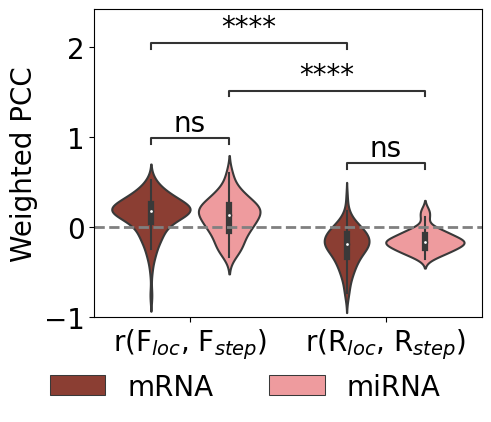

In [12]:
selector = (df_plot["pair_name"] == r"r(F$_{loc}$, F$_{step}$)") | (
    df_plot["pair_name"] == r"r(R$_{loc}$, R$_{step}$)"
)

plt.close()
plt.figure(figsize=(5, 4))
ax = sns.violinplot(
    data=df_plot[selector],
    x="pair_name",
    y="pearsonr",
    hue="label",
    dodge=True,
    hue_order=["mRNA", "miRNA"],
    palette=["#9a3324", "#fc8d91"],
)
plt.ylim(-1, 2.2)
add_stat_annotation(
    ax,
    data=df_plot[selector],
    x="pair_name",
    y="pearsonr",
    hue="label",
    box_pairs=[
        (
            (r"r(F$_{loc}$, F$_{step}$)", "mRNA"),
            (r"r(F$_{loc}$, F$_{step}$)", "miRNA"),
        ),
        (
            (r"r(R$_{loc}$, R$_{step}$)", "mRNA"),
            (r"r(R$_{loc}$, R$_{step}$)", "miRNA"),
        ),
        (
            (r"r(F$_{loc}$, F$_{step}$)", "miRNA"),
            (r"r(R$_{loc}$, R$_{step}$)", "miRNA"),
        ),
        (
            (r"r(F$_{loc}$, F$_{step}$)", "mRNA"),
            (r"r(R$_{loc}$, R$_{step}$)", "mRNA"),
        ),
    ],
    test="t-test_ind",
    text_format="star",
    loc="inside",
    verbose=2,
    line_offset_to_box=0.1,
)
plt.legend(
    frameon=False,
    loc="upper center",
    ncol=2,
    bbox_to_anchor=(0.39, -0.1),
)
plt.ylabel("Weighted PCC", fontsize=20)
plt.gca().set(xlabel=None)
plt.rcParams.update({"font.size": 20})
plt.axhline(0, ls="--", c="gray", lw=2)
os.chdir(dirname(folder_FUS_miR21))
plt.savefig("FL_vs_miR21_PCC_SI.png", format="png", dpi=300, bbox_inches="tight")